<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/supplementary_tables/SupplementaryTable5/GSVA_GeoMx_figures_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GSVA for GeoMx
#SupplementaryTable5 GeoMx_GSVA, Supplementary Figure 6F

## link Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install scanpy seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=664a01ef443ef533c17d678e3e5d8261abf7308c14212a9fffd1a352ca2bd76a
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=9c56abf32e5e43e74

In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318084 sha256=8b2020a09850a4ec34128db65bf79502edbf82158bb456f0e8ce7d623926bf52
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("BiocManager")
BiocManager::install("GSVA")
BiocManager::install("GSEABase")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpMWL4Mb/downloaded_packages’

'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com



























































































































































































































































	‘/tmp/RtmpMWL4Mb/downloaded_packages’

  'jsonlite', 'knitr', 'pkgload', 'rmarkdown', 'roxygen2', 'sys', 'tidyverse',
  'whisker', 'boot', 'foreign'



Update all/some/none? [a/s/n]: n


'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com


  'jsonlite', 'knitr', 'pkgload', 'rmarkdown', 'roxygen2', 'sys', 'tidyverse',
  'whisker', 'boot', 'foreign'



Update all/some/none? [a/s/n]: n


In [ ]:
import numpy as np
import scanpy as sc
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
%%R
library(GSVA)
library(GSEABase)


Attaching package: ‘BiocGenerics’



    IQR, mad, sd, var, xtabs



    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min




    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.







Attaching package: ‘S4Vectors’



    findMatches



    expand.grid, I, unname



Attaching package: ‘XML’



    toHTML



Attaching package: ‘graph’



    addNode




#load hallmark gene sets

In [ ]:
%%R
hallmark.gmt<- getGmt("/content/drive/MyDrive/MsigDB/mh.all.v2023.1.Mm.symbols.gmt", geneIdType=SymbolIdentifier())
Clases.gmt <- geneIds(hallmark.gmt)

#Donor labels

#load data

In [ ]:
%%R
# specify the file path
file_path <- "/content/drive/MyDrive/GeoMx_CIP/GSEA/2023-04-25_BatchCorr_GeoMx_matrix.csv"

# read the CSV file into a data frame
df <- read.csv(file_path, header = TRUE, row.names = 1)

# print the first 5 rows of the data frame
head(df)


       TMA1.026 TMA1.017 TMA1.027 TMA1.003 TMA1.002 TMA1.004 TMA2.012 TMA1.009
Percc1 5.860696 6.123680 6.039292 5.912781 5.618684 6.134666 5.752369 5.778327
Ptges2 6.153071 5.702724 5.906970 5.927893 5.799603 5.872735 5.963825 5.857371
Dtd2   5.687155 5.677002 5.614836 6.106047 5.580951 5.779764 5.661225 5.916871
Eif2b5 5.854156 6.006109 6.090185 5.819541 6.144101 5.683702 5.753279 5.839487
Nkapd1 5.598588 5.482919 5.835462 5.884178 5.654162 6.049619 5.716395 5.754018
Plxdc2 5.734694 5.622190 5.787460 6.022160 5.884533 5.832911 5.877801 5.814381
       TMA2.029 TMA1.005 TMA1.015 TMA2.016 TMA2.021 TMA1.001 TMA1.020 TMA1.006
Percc1 5.890542 5.689794 5.871826 5.852036 5.841851 6.219085 5.761109 5.599899
Ptges2 5.675294 5.929248 5.726363 6.100545 5.939943 5.611700 5.911611 5.775845
Dtd2   5.837202 5.897876 5.832451 5.967344 5.576736 5.612905 5.744543 5.765151
Eif2b5 5.784501 6.024680 5.814881 6.068889 5.769364 5.817960 6.102073 6.130938
Nkapd1 5.543425 5.594956 5.789821 5.830544 5.804003 

In [ ]:
%%R
data <- as.matrix(df)
colnames(data) <- paste0("A_", 1:ncol(data))

##Run GSVA

In [ ]:
 %%R -o GSVA_res
GSVA_res <- gsva(data, #your data
                      Clases.gmt, # your gene set collection
                      min.sz=1, max.sz=2000, #criteria for filtering gene sets
                      verbose=FALSE,
                      mx.diff=FALSE,
                      method="gsva")

In [ ]:
%%R
# Replace column names of GSVA_res with the column names of df
colnames(GSVA_res) <- colnames(df)

# Write the modified GSVA_res object to a CSV file
write.csv(GSVA_res, "GSVA_res.csv")

In [ ]:
GSVA_res = pd.read_csv('./GSVA_res.csv', header=0,index_col=0, sep=',')

In [ ]:
# Replace periods (.) with spaces in the column names
GSVA_res.columns = GSVA_res.columns.str.replace('.', ' ')

<ipython-input-14-27afa07479d7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  GSVA_res.columns = GSVA_res.columns.str.replace('.', ' ')


In [ ]:
GSVA_res

,TMA1 026,TMA1 017,TMA1 027,TMA1 003,TMA1 002,TMA1 004,TMA2 012,TMA1 009,TMA2 029,TMA1 005,...,TMA1 008,TMA2 005,TMA1 013,TMA2 020,TMA2 018,TMA2 001,TMA2 015,TMA2 022,TMA2 003,TMA1 010
HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.221838,-0.204827,-0.156127,-0.237117,-0.264987,0.251660,-0.214089,0.307379,0.207684,0.233534,...,0.241427,0.385253,-0.134911,-0.169253,-0.302061,-0.221306,-0.290965,-0.225071,-0.261862,0.327103
HALLMARK_HYPOXIA,-0.227599,-0.166463,0.151273,-0.211515,-0.254043,0.303491,-0.226132,0.220022,0.277275,0.239650,...,0.197863,0.342320,0.161844,-0.151844,-0.294576,-0.215141,-0.295398,-0.201680,-0.198224,0.211735
HALLMARK_CHOLESTEROL_HOMEOSTASIS,-0.214169,-0.352865,0.192574,-0.287554,-0.340935,0.434743,-0.147523,0.303617,0.552669,0.478470,...,0.289403,0.411577,-0.238462,-0.306853,-0.378785,-0.210148,-0.540308,-0.149834,-0.171930,0.355409
HALLMARK_MITOTIC_SPINDLE,-0.274065,-0.253630,-0.189067,-0.189631,-0.199200,0.409200,-0.135005,0.362643,0.188841,0.411374,...,0.303338,0.421677,-0.155759,-0.289723,-0.276301,-0.237222,-0.147548,-0.335963,-0.401067,0.313743
HALLMARK_WNT_BETA_CATENIN_SIGNALING,-0.302577,0.276105,-0.181493,-0.184396,0.278513,0.186169,-0.227104,-0.212294,-0.215408,0.259948,...,0.257471,0.331332,-0.206624,-0.263957,0.301505,-0.210170,-0.319337,-0.264680,-0.526510,0.357243
HALLMARK_TGF_BETA_SIGNALING,-0.389890,-0.317798,-0.274659,0.216650,-0.236164,0.586203,-0.360632,0.348833,0.344191,0.513286,...,0.393142,0.501439,0.157532,-0.340066,-0.394260,-0.330279,-0.401338,-0.490524,-0.341868,0.463279
HALLMARK_IL6_JAK_STAT3_SIGNALING,-0.206590,-0.214123,0.156413,-0.274448,0.204569,0.292632,-0.224549,0.272444,0.331606,0.284726,...,0.229096,0.363487,0.227859,0.220973,-0.312327,-0.332846,-0.338635,-0.178083,-0.260578,0.304427
HALLMARK_DNA_REPAIR,-0.205970,-0.329165,-0.238813,-0.224532,-0.114472,0.313099,0.240124,0.249050,0.200538,0.349617,...,0.332359,0.406591,-0.166571,-0.202580,-0.204252,-0.176275,-0.282344,-0.308147,-0.305273,0.202190
HALLMARK_G2M_CHECKPOINT,-0.306063,-0.343062,-0.247679,0.149563,-0.216217,0.221158,0.213457,0.299308,0.173651,0.342165,...,0.309722,0.384032,-0.156727,-0.224466,-0.311950,-0.149841,0.218746,-0.259960,-0.306405,0.266698
HALLMARK_APOPTOSIS,-0.298053,-0.257907,-0.247923,-0.242404,-0.239993,0.337149,0.169593,0.383388,0.265624,0.323641,...,0.340611,0.372635,0.218843,-0.179459,-0.327731,-0.185476,-0.279563,-0.323483,-0.390805,0.370326


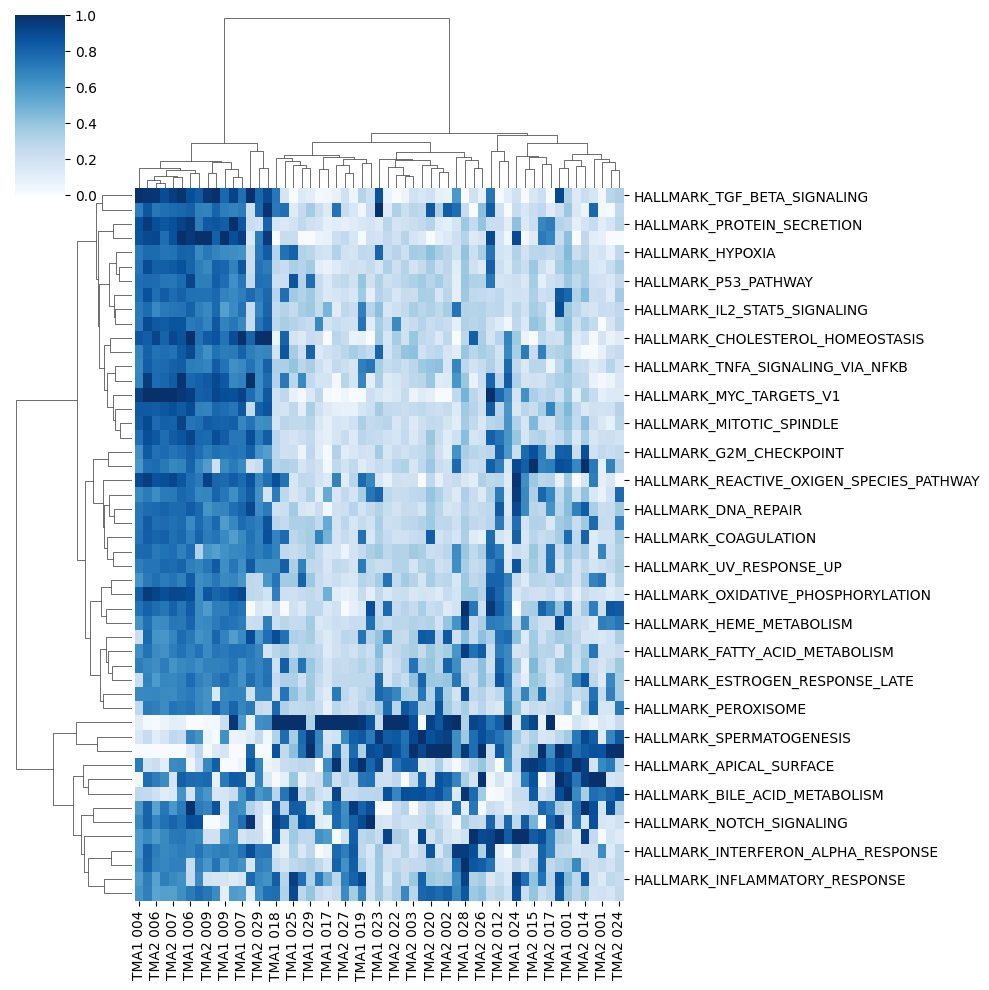

In [ ]:
sb.clustermap(GSVA_res, metric="euclidean", method="ward", cmap="Blues",standard_scale=1)

#metadata

In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/GeoMx_CIP/metadata_QC_BQC_FilTarget.csv', header=0,index_col=0, sep=',')

In [ ]:
metadata

,CellType,Donor,Treatment,Slide
Sample,,,,
CIP_7d_TMA1,GeoMx,TMA1 026,CIP_7d,TMA1
CIP_7d_TMA1,GeoMx,TMA1 017,CIP_7d,TMA1
CIP_48hr_TMA1,GeoMx,TMA1 027,CIP_48hr,TMA1
C_UI_TMA1,GeoMx,TMA1 003,C_UI,TMA1
C_UI_TMA1,GeoMx,TMA1 002,C_UI,TMA1
CIP_3hr_TMA1,GeoMx,TMA1 004,CIP_3hr,TMA1
CIP_48hr_TMA2,GeoMx,TMA2 012,CIP_48hr,TMA2
CIP_24hr_TMA1,GeoMx,TMA1 009,CIP_24hr,TMA1
CIP_3hr_TMA2,GeoMx,TMA2 029,CIP_3hr,TMA2


In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming GSVA_res and metadata DataFrames are already defined

# Transpose GSVA_res to have sample names as index
GSVA_res_transposed = GSVA_res.transpose()

# Reset index to create a column with sample names
GSVA_res_transposed.reset_index(inplace=True)

# Merge the GSVA_res_transposed DataFrame with the metadata DataFrame
merged_data = GSVA_res_transposed.merge(metadata, left_on='index', right_on='Donor')

# Melt the merged DataFrame to have the columns Gene_Set, GSVA_Score, and Treatment
melted_data = pd.melt(merged_data, id_vars=['Treatment'], value_vars=GSVA_res.index, var_name='Gene_Set', value_name='GSVA_Score')

melted_data


,Treatment,Gene_Set,GSVA_Score
0,CIP_7d,HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.221838
1,CIP_7d,HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.204827
2,CIP_48hr,HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.156127
3,C_UI,HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.237117
4,C_UI,HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.264987
...,...,...,...
2845,C_UI,HALLMARK_PANCREAS_BETA_CELLS,-0.238824
2846,CIP_72hr,HALLMARK_PANCREAS_BETA_CELLS,0.262037
2847,CIP_14d,HALLMARK_PANCREAS_BETA_CELLS,0.473561
2848,C_UI,HALLMARK_PANCREAS_BETA_CELLS,0.273764


In [ ]:
# print the unique values of the Gene_Set column in melted_data, separated by commas
unique_gene_sets = melted_data['Treatment'].unique()
print(', '.join(unique_gene_sets))

CIP_7d, CIP_48hr, C_UI, CIP_3hr, CIP_24hr, CIP_12hr, CIP_5d, CIP_14d, CIP_30d, CIP_72hr


In [ ]:
metadata

,CellType,Donor,Treatment,Slide
Sample,,,,
CIP_7d_TMA1,GeoMx,TMA1 026,CIP_7d,TMA1
CIP_7d_TMA1,GeoMx,TMA1 017,CIP_7d,TMA1
CIP_48hr_TMA1,GeoMx,TMA1 027,CIP_48hr,TMA1
C_UI_TMA1,GeoMx,TMA1 003,C_UI,TMA1
C_UI_TMA1,GeoMx,TMA1 002,C_UI,TMA1
CIP_3hr_TMA1,GeoMx,TMA1 004,CIP_3hr,TMA1
CIP_48hr_TMA2,GeoMx,TMA2 012,CIP_48hr,TMA2
CIP_24hr_TMA1,GeoMx,TMA1 009,CIP_24hr,TMA1
CIP_3hr_TMA2,GeoMx,TMA2 029,CIP_3hr,TMA2


#ttest for significance

In [ ]:
from statsmodels.stats.multitest import multipletests

In [ ]:
for group in group_names:
    # extract the sample IDs for the current group and the control group
    current_samples = metadata[metadata['Treatment'] == group]['Donor']
    control_samples = metadata[metadata['Treatment'] == 'C_UI']['Donor']

    # extract GSVA scores for current group
    current_scores_gsva = melted_data.loc[melted_data['Treatment'] == group, 'GSVA_Score']

    # calculate median GSVA score for current group
    median_gsva_score = current_scores_gsva.median()


    # initialize empty lists to store t-statistics and p-values for each row
    t_values = []
    p_values = []

    # iterate over each row in GSVA_res
    for idx, row in GSVA_res.iterrows():
        # extract the GSVA scores for the current group and the control group
        current_scores = row[current_samples]
        control_scores = row[control_samples]

        # perform a two-sample t-test between the current group and the control group
        t, p = ttest_ind(current_scores, control_scores)

        # store t-statistics and p-values
        t_values.append(t)
        p_values.append(p)

    # correct the p-values for multiple hypothesis testing using the Benjamini-Hochberg procedure
    corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

    # add t-statistics, corrected p-values, and median GSVA score to the results DataFrame
    results[group + "_t_statistic"] = t_values
    results[group + "_corrected_p_value"] = corrected_p_values
    results[group + "_median_GSVA_Score"] = median_gsva_score


In [ ]:
results

,CIP_7d_t_statistic,CIP_7d_corrected_p_value,CIP_48hr_t_statistic,CIP_48hr_corrected_p_value,C_UI_t_statistic,C_UI_corrected_p_value,CIP_3hr_t_statistic,CIP_3hr_corrected_p_value,CIP_24hr_t_statistic,CIP_24hr_corrected_p_value,...,CIP_7d_median_GSVA_Score,CIP_48hr_median_GSVA_Score,C_UI_median_GSVA_Score,CIP_3hr_median_GSVA_Score,CIP_24hr_median_GSVA_Score,CIP_12hr_median_GSVA_Score,CIP_5d_median_GSVA_Score,CIP_14d_median_GSVA_Score,CIP_30d_median_GSVA_Score,CIP_72hr_median_GSVA_Score
Gene set,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.446246,0.851380,2.453793,0.106363,0.0,1.0,16.254184,1.720538e-06,18.018871,1.631427e-08,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722
HALLMARK_HYPOXIA,0.597769,0.770492,1.463344,0.348168,0.0,1.0,26.761765,2.045037e-07,15.674376,3.981874e-08,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722
HALLMARK_CHOLESTEROL_HOMEOSTASIS,-0.612060,0.770492,4.123051,0.034450,0.0,1.0,16.265900,1.720538e-06,18.428736,1.604027e-08,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722
HALLMARK_MITOTIC_SPINDLE,-1.069607,0.663769,2.708517,0.084575,0.0,1.0,7.394929,2.552198e-04,13.764686,1.169331e-07,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.585291,0.770492,-0.342570,0.821126,0.0,1.0,0.369637,7.672834e-01,2.548008,3.303780e-02,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722
HALLMARK_TGF_BETA_SIGNALING,-1.570696,0.516262,0.610036,0.730850,0.0,1.0,5.009154,3.061355e-03,7.789103,2.214096e-05,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722
HALLMARK_IL6_JAK_STAT3_SIGNALING,-1.014066,0.664675,-0.140579,0.937291,0.0,1.0,3.411034,1.544314e-02,4.476786,1.418715e-03,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722
HALLMARK_DNA_REPAIR,-1.222109,0.655304,1.856440,0.221564,0.0,1.0,3.963066,7.998322e-03,6.012280,1.624108e-04,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722
HALLMARK_G2M_CHECKPOINT,-1.977168,0.368124,1.113864,0.520998,0.0,1.0,2.285614,7.590740e-02,4.889103,7.739878e-04,...,-0.220935,-0.159423,-0.21475,0.230131,0.281163,0.313009,-0.200949,-0.202456,-0.214153,-0.197722


In [ ]:
group_names = metadata['Treatment'].unique()
sample_names = metadata['Donor'].unique()

# create an empty DataFrame to store the results
results = pd.DataFrame(index=GSVA_res.index)

for group in group_names:
    # extract the sample IDs for the current group and the control group
    current_samples = metadata[metadata['Treatment'] == group]['Donor']
    control_samples = metadata[metadata['Treatment'] == 'C_UI']['Donor']

    # initialize empty lists to store t-statistics, p-values and median GSVA scores for each row
    t_values = []
    p_values = []
    median_gsva_scores = []

    # iterate over each row in GSVA_res
    for idx, row in GSVA_res.iterrows():
        # extract the GSVA scores for the current group and the control group
        current_scores = row[current_samples]
        control_scores = row[control_samples]

        # calculate median GSVA score for the current row
        median_gsva_score = current_scores.median()
        median_gsva_scores.append(median_gsva_score)

        # perform a two-sample t-test between the current group and the control group
        t, p = ttest_ind(current_scores, control_scores)

        # store t-statistics and p-values
        t_values.append(t)
        p_values.append(p)

    # correct the p-values for multiple hypothesis testing using the Benjamini-Hochberg procedure
    corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

    # add median GSVA scores, t-statistics and corrected p-values to the results DataFrame
    results[group + "_median_gsva_score"] = median_gsva_scores
    results[group + "_t_statistic"] = t_values
    results[group + "_corrected_p_value"] = corrected_p_values

# print the results
print(results)


                                            CIP_7d_median_gsva_score  \
Gene set                                                               
HALLMARK_TNFA_SIGNALING_VIA_NFKB                           -0.233941   
HALLMARK_HYPOXIA                                           -0.214347   
HALLMARK_CHOLESTEROL_HOMEOSTASIS                           -0.260618   
HALLMARK_MITOTIC_SPINDLE                                   -0.277624   
HALLMARK_WNT_BETA_CATENIN_SIGNALING                        -0.037697   
HALLMARK_TGF_BETA_SIGNALING                                -0.384540   
HALLMARK_IL6_JAK_STAT3_SIGNALING                           -0.220220   
HALLMARK_DNA_REPAIR                                        -0.254606   
HALLMARK_G2M_CHECKPOINT                                    -0.317864   
HALLMARK_APOPTOSIS                                         -0.284131   
HALLMARK_NOTCH_SIGNALING                                   -0.262094   
HALLMARK_ADIPOGENESIS                                      -0.18

In [ ]:
results

,CIP_7d_median_gsva_score,CIP_7d_t_statistic,CIP_7d_corrected_p_value,CIP_48hr_median_gsva_score,CIP_48hr_t_statistic,CIP_48hr_corrected_p_value,C_UI_median_gsva_score,C_UI_t_statistic,C_UI_corrected_p_value,CIP_3hr_median_gsva_score,...,CIP_5d_corrected_p_value,CIP_14d_median_gsva_score,CIP_14d_t_statistic,CIP_14d_corrected_p_value,CIP_30d_median_gsva_score,CIP_30d_t_statistic,CIP_30d_corrected_p_value,CIP_72hr_median_gsva_score,CIP_72hr_t_statistic,CIP_72hr_corrected_p_value
Gene set,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.233941,0.446246,0.851380,-0.156127,2.453793,0.106363,-0.237117,0.0,1.0,0.251660,...,0.817256,-0.169253,2.022806,0.447280,-0.196408,1.596443,0.745977,-0.269222,0.038328,0.970263
HALLMARK_HYPOXIA,-0.214347,0.597769,0.770492,-0.181342,1.463344,0.348168,-0.211515,0.0,1.0,0.296639,...,0.991207,-0.181309,2.258240,0.433483,-0.212921,0.620501,0.936621,-0.223323,0.841450,0.726684
HALLMARK_CHOLESTEROL_HOMEOSTASIS,-0.260618,-0.612060,0.770492,0.192574,4.123051,0.034450,-0.237176,0.0,1.0,0.434743,...,0.796436,-0.306853,-1.282720,0.505789,-0.279748,-1.231154,0.745977,-0.315331,-1.847750,0.542779
HALLMARK_MITOTIC_SPINDLE,-0.277624,-1.069607,0.663769,-0.135005,2.708517,0.084575,-0.199200,0.0,1.0,0.188841,...,0.989260,-0.243023,0.090262,0.950835,-0.230092,0.120052,0.965812,-0.151653,1.616613,0.651652
HALLMARK_WNT_BETA_CATENIN_SIGNALING,-0.037697,0.585291,0.770492,-0.227104,-0.342570,0.821126,-0.210170,0.0,1.0,-0.215408,...,0.111484,-0.263957,0.498680,0.798221,-0.271812,0.093333,0.965812,-0.209685,0.232029,0.935401
HALLMARK_TGF_BETA_SIGNALING,-0.384540,-1.570696,0.516262,-0.254130,0.610036,0.730850,-0.288503,0.0,1.0,0.348448,...,0.989260,-0.340066,-0.442821,0.798221,-0.253089,0.317069,0.940406,-0.330125,0.067302,0.967156
HALLMARK_IL6_JAK_STAT3_SIGNALING,-0.220220,-1.014066,0.664675,-0.224549,-0.140579,0.937291,-0.260578,0.0,1.0,0.331606,...,0.991207,-0.194375,0.087371,0.950835,-0.235673,-0.297553,0.940406,-0.294263,-0.341870,0.922549
HALLMARK_DNA_REPAIR,-0.254606,-1.222109,0.655304,0.183468,1.856440,0.221564,-0.176275,0.0,1.0,0.213295,...,0.991207,-0.253439,-1.401272,0.475987,-0.211918,-1.047205,0.745977,-0.006715,1.088006,0.712537
HALLMARK_G2M_CHECKPOINT,-0.317864,-1.977168,0.368124,0.136292,1.113864,0.520998,-0.206897,0.0,1.0,0.173651,...,0.958116,-0.259960,-1.486632,0.475987,-0.248711,-1.293570,0.745977,0.207261,1.971247,0.542779


In [ ]:
results.index.name = 'Gene set'

In [ ]:
results.to_csv('/content/drive/MyDrive/GeoMx_CIP/GSEA/2023-06-02_GeoMx_GSVA_correctedpval_genes.csv')


#Plotting all

In [ ]:
# Define the list of Gene_Sets to include in the plot
lst1 = lst1 = ['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_DNA_REPAIR', 'HALLMARK_APOPTOSIS', 'HALLMARK_MYC_TARGETS_V1',
        'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'HALLMARK_KRAS_SIGNALING_UP', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION',
 'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY','HALLMARK_IL2_STAT5_SIGNALING' ]


# Filter the melted_data DataFrame to only include rows where Gene_Set is in lst1
melted_data_filtered = melted_data[melted_data['Gene_Set'].isin(lst1)]


In [ ]:
import re

# Define a function to convert text to proper case
def proper_case(text):
    lst_exceptions = ['DNA', 'E2F', 'G2M', 'UV', 'PI3K']

    # Remove the word "HALLMARK" (case-insensitive) from any point in the text
    text = re.sub('(?i)HALLMARK', '', text)

    words = text.split('_')
    words = [word.capitalize() if word not in lst_exceptions else word for word in words]
    text = ' '.join(words)

    # Replace text after capitalization
    text = re.sub('(?i)MTORC1', 'mTORC1', text)
    text = re.sub('(?i)PI3K Akt Mtor', 'PI3K/Akt/mTOR', text)

    return text

In [ ]:
# Apply the proper_case function to the index column
melted_data_filtered['Gene_Set'] = melted_data_filtered['Gene_Set'].map(proper_case)

# Print the updated dataframe
print(melted_data_filtered)

     Treatment                  Gene_Set  GSVA_Score
0       CIP_7d   Tnfa Signaling Via Nfkb   -0.221838
1       CIP_7d   Tnfa Signaling Via Nfkb   -0.204827
2     CIP_48hr   Tnfa Signaling Via Nfkb   -0.156127
3         C_UI   Tnfa Signaling Via Nfkb   -0.237117
4         C_UI   Tnfa Signaling Via Nfkb   -0.264987
...        ...                       ...         ...
2731      C_UI         Kras Signaling Up   -0.192914
2732  CIP_72hr         Kras Signaling Up   -0.195489
2733   CIP_14d         Kras Signaling Up   -0.170661
2734      C_UI         Kras Signaling Up   -0.261944
2735  CIP_24hr         Kras Signaling Up    0.183058

[513 rows x 3 columns]


<ipython-input-39-329baa56c7a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_data_filtered['Gene_Set'] = melted_data_filtered['Gene_Set'].map(proper_case)


In [ ]:
# Create a gradient color palette from one color to another

# Create a gradient color palette from one color to another
# start_color = np.array([255, 255, 255]) / 255  # White
# end_color = np.array([0, 0, 139]) / 255  # Dark Blue

# start_color = np.array([0, 0, 0]) / 255  # Black
# end_color = np.array([240, 128, 128]) / 255  # Light Coral

# start_color = np.array([255, 255, 255]) / 255  # White
# end_color = np.array([0, 100, 0]) / 255  # Dark Green

# start_color = np.array([0, 0, 0]) / 255  # Black
# end_color = np.array([240, 128, 128]) / 255  # Light Coral

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import matplotlib.font_manager as fm

<ipython-input-41-af989ba5e3fa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_data_filtered['Treatment'] = melted_data_filtered['Treatment'].replace(rename_dict)
<ipython-input-41-af989ba5e3fa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_data_filtered['Treatment'] = pd.Categorical(melted_data_filtered['Treatment'], categories=groups_rename, ordered=True)


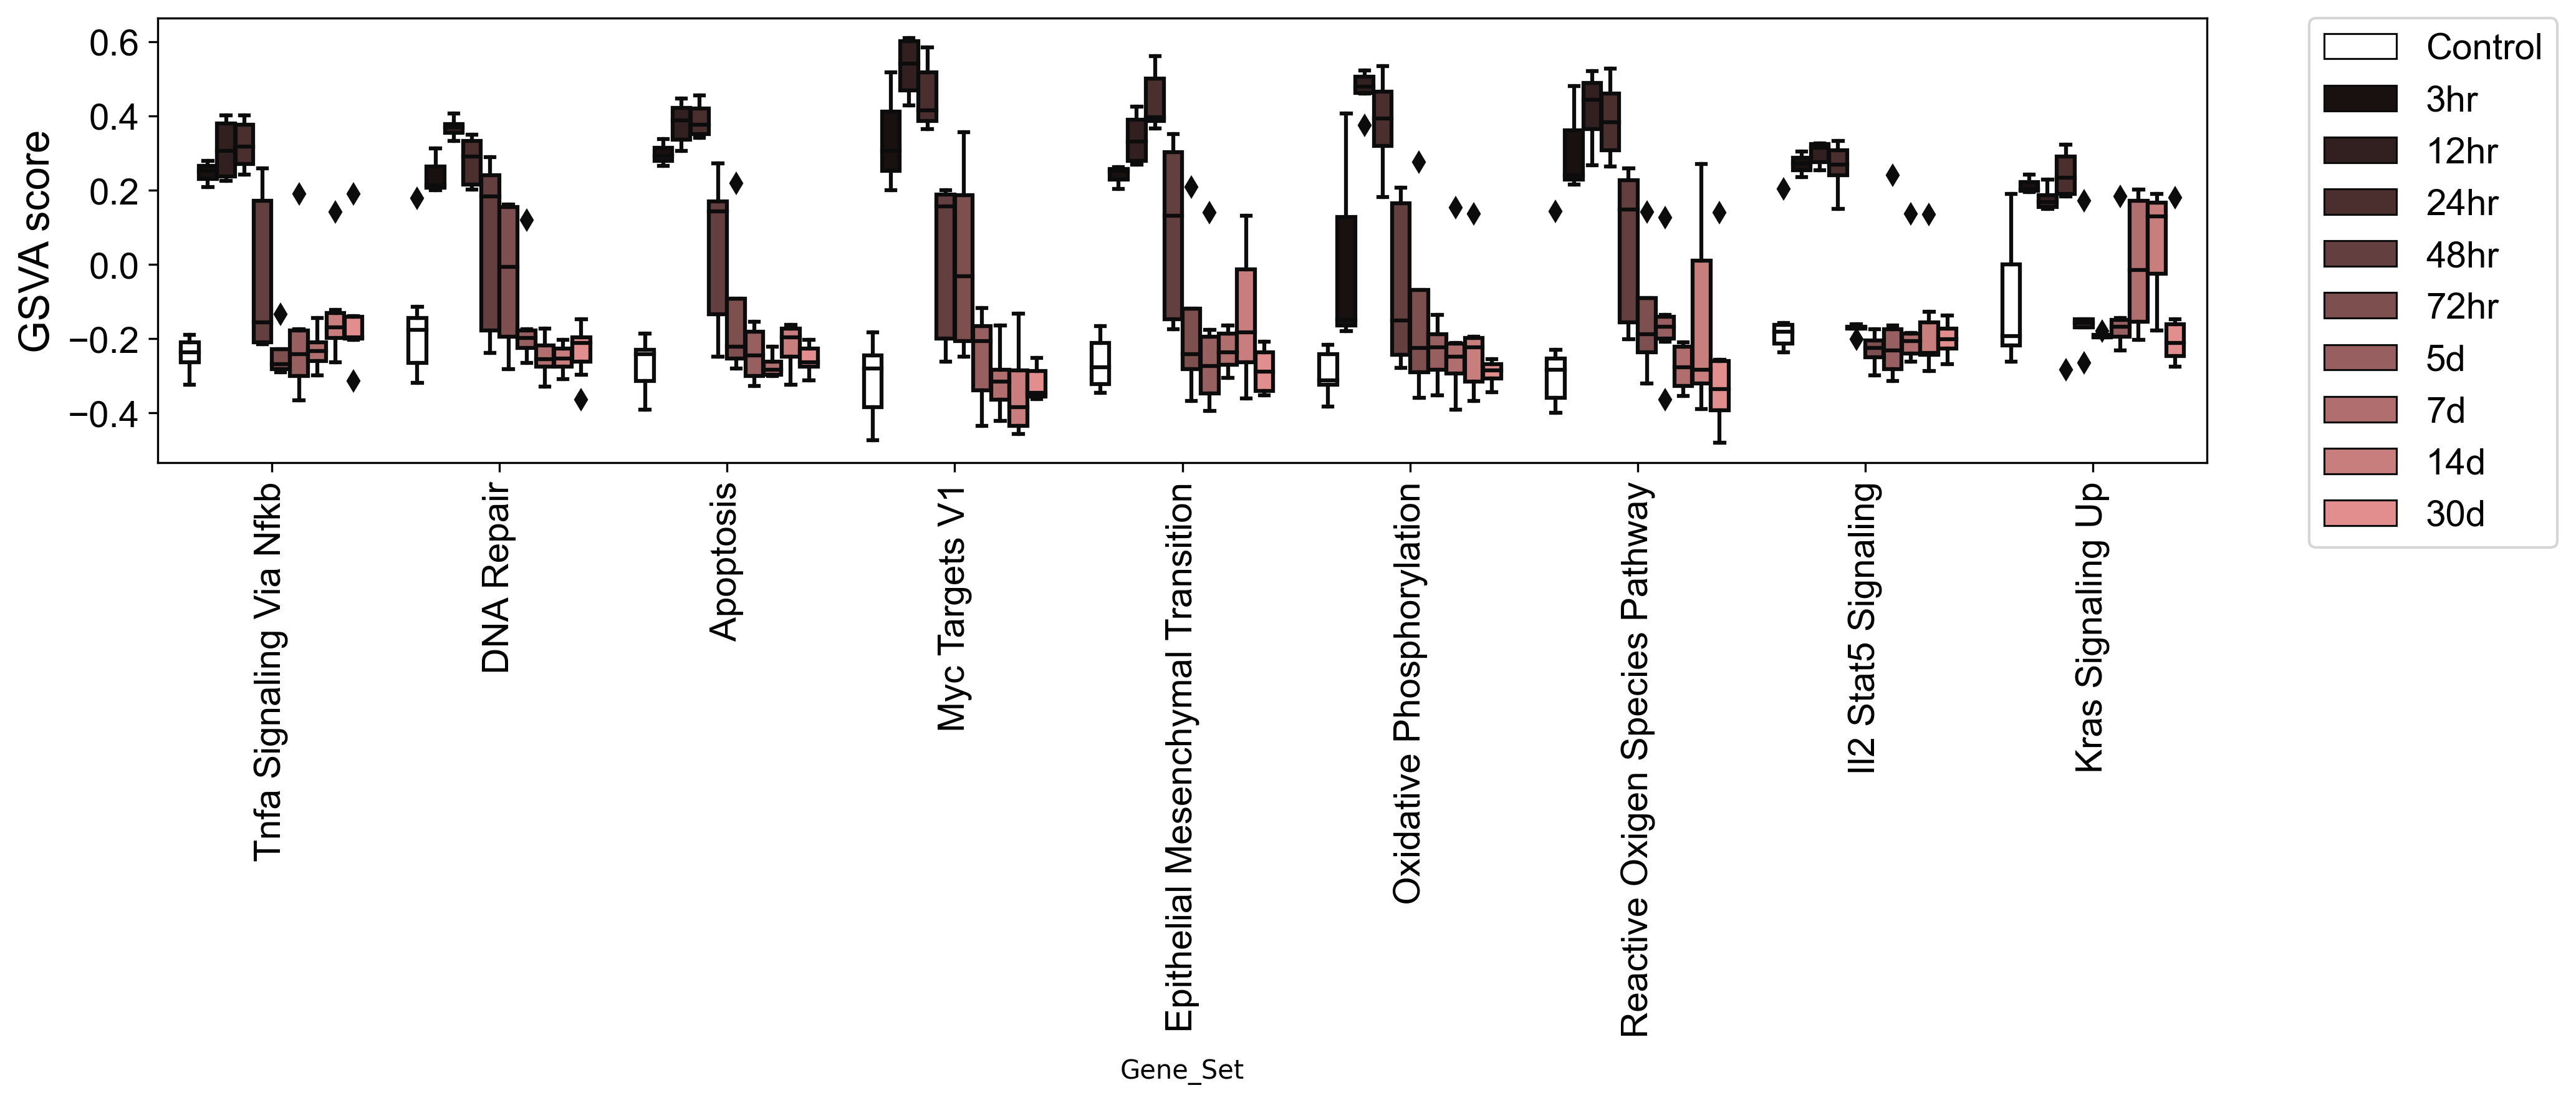

In [ ]:
# Define the desired order of the "Treatment" groups and the new group names
desired_order = ['C_UI', 'CIP_3hr', 'CIP_12hr', 'CIP_24hr', 'CIP_48hr', 'CIP_72hr', 'CIP_5d', 'CIP_7d', 'CIP_14d', 'CIP_30d']
groups_rename = ['Control', '3hr', '12hr', '24hr', '48hr', '72hr', '5d', '7d', '14d', '30d']

# Create a dictionary to map the original group names to the new group names
rename_dict = dict(zip(desired_order, groups_rename))

# Rename the Treatment groups in the melted_data_filtered DataFrame
melted_data_filtered['Treatment'] = melted_data_filtered['Treatment'].replace(rename_dict)

# Convert "Treatment" column to a categorical variable with the desired order
melted_data_filtered['Treatment'] = pd.Categorical(melted_data_filtered['Treatment'], categories=groups_rename, ordered=True)

# Create a gradient color palette from one color to another
start_color = np.array([0, 0, 0]) / 255  # Black
end_color = np.array([240, 128, 128]) / 255  # Light Coral
num_colors = len(groups_rename)
color_palette = [start_color + (end_color - start_color) * i / (num_colors - 1) for i in range(num_colors)]

# Change the color of the "Control" condition to white
color_palette[0] = [1, 1, 1]

# Plot the data using seaborn with the custom color palette
plt.figure(figsize=(12, 6), dpi=300)
sb.boxplot(x='Gene_Set', y='GSVA_Score', hue='Treatment', data=melted_data_filtered, palette=color_palette)

# Change y axis label and increase font size of all text
arial_font_path = '/content/drive/MyDrive/arial/arial.ttf'
arial_font = fm.FontProperties(fname=arial_font_path, size=16)
plt.ylabel('GSVA score', fontproperties=arial_font, fontsize=16)
plt.xticks(fontproperties=arial_font, fontsize=14)
plt.yticks(fontproperties=arial_font, fontsize=14)

plt.xticks(rotation=90)
plt.tight_layout()

# Set the font properties for the legend
legend_font = fm.FontProperties(fname=arial_font_path, size=14)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop=legend_font)

# Show the plot
plt.show()
